In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
import numpy as np
import cv2
from PIL import Image

#import cc3d

from skimage.measure import regionprops, label, find_contours
from scipy.spatial.distance import cdist

import pandas as pd

In [2]:
#値を-1から1に正規化する関数
def normalize_x(image):
    return image / 127.5 - 1


def denormalize_x(image):
    return (image + 1) * 127.5


#値を0から1正規化する関数
def normalize_y(image):
    return image / 255


#値を0から255に戻す関数
def denormalize_y(image):
    return image * 255

In [3]:

# インプット画像を読み込む関数
def load_X_gray(folder_path):
    
    image_files = []

    #image_files = os.listdir(folder_path)
       
    for file in os.listdir(folder_path):
        base, ext = os.path.splitext(file)
        if ext == '.png':
            image_files.append(file)
        else :
            pass
        
    image_files.sort()
    print (image_files)
    
    img = cv2.imread(folder_path + os.sep + image_files[0], cv2.IMREAD_GRAYSCALE)
    
    #image_files = image_files[1:]
    images = np.zeros((len(image_files), img.shape[0], img.shape[1], 1), np.float32)
    for i, image_file in enumerate(image_files):
        image = cv2.imread(folder_path + os.sep + image_file, cv2.IMREAD_GRAYSCALE)
        print (image.shape)
        #image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))
        image = image[:, :, np.newaxis]
        images[i] = normalize_x(image)
    return images, image_files


def load_Y_gray_with_gaussian_and_numeric(folder_path, thresh = None , normalize = True, g_size = None):
    image_files = []
    #image_files = os.listdir(folder_path)
    
    for file in os.listdir(folder_path):
        base, ext = os.path.splitext(file)
        if ext == '.png':
            image_files.append(int(base))
        else:
            pass
        
    image_files.sort()
    print(image_files)
    
    img = cv2.imread(folder_path + os.sep + str(image_files[0]).zfill(4) + ".png", cv2.IMREAD_GRAYSCALE)
    
    images = np.zeros(
        (len(image_files), img.shape[0], img.shape[1], 1) ,np.float32
    )
    
    for i , image_file in enumerate(image_files):
        image = cv2.imread(
            folder_path + os.sep + str(image_file).zfill(4) + ".png" ,
            cv2.IMREAD_GRAYSCALE
        )
        #print(image.shape)
        
        # ぼかし処理
        if g_size:
            image = cv2.GaussianBlur(
                image, (g_size, g_size), 0
            )
        
        
        
        if thresh:
            ret , image = cv2.threshold(image , thresh , 255 , cv2.THRESH_BINARY)
        image = image[ : , : , np.newaxis]
        if normalize:
            images[i] = normalize_y(image)
        else:
            images[i] = image
            
    print(images.shape)
    
    return images , image_files

In [4]:
def make_mask_img(ori_img, mask_img):
    mask_img_rgb = np.zeros((mask_img.shape[0], mask_img.shape[1], 3), np.float32)
    mask_img_rgb[:,:,0] = mask_img[:,:,0]
    mask_img_rgb[:,:,1] = mask_img[:,:,0]
    masked_img = cv2.addWeighted(mask_img_rgb,0.5,cv2.cvtColor(ori_img + 0.75, cv2.COLOR_GRAY2BGR),0.6,0)
    return masked_img

In [5]:
ori_imgs, _ = load_X_gray(r"Z:\DeepLearningData\research_010_NIH3T3\shOPA1_003\dataset\cropped_005\resize_10x10x10")

['0000.png', '0001.png', '0002.png', '0003.png', '0004.png', '0005.png', '0006.png', '0007.png', '0008.png', '0009.png', '0010.png', '0011.png', '0012.png', '0013.png', '0014.png', '0015.png', '0016.png', '0017.png', '0018.png', '0019.png', '0020.png', '0021.png', '0022.png', '0023.png', '0024.png', '0025.png', '0026.png', '0027.png', '0028.png', '0029.png', '0030.png', '0031.png', '0032.png', '0033.png', '0034.png', '0035.png', '0036.png', '0037.png', '0038.png', '0039.png', '0040.png', '0041.png', '0042.png', '0043.png', '0044.png', '0045.png', '0046.png', '0047.png', '0048.png', '0049.png', '0050.png', '0051.png', '0052.png', '0053.png', '0054.png', '0055.png', '0056.png', '0057.png', '0058.png', '0059.png', '0060.png', '0061.png', '0062.png', '0063.png', '0064.png', '0065.png', '0066.png', '0067.png', '0068.png', '0069.png', '0070.png', '0071.png', '0072.png', '0073.png', '0074.png', '0075.png', '0076.png', '0077.png', '0078.png', '0079.png', '0080.png', '0081.png', '0082.png', '00

(1016, 964)
(1016, 964)
(1016, 964)
(1016, 964)
(1016, 964)
(1016, 964)
(1016, 964)
(1016, 964)
(1016, 964)
(1016, 964)
(1016, 964)
(1016, 964)
(1016, 964)
(1016, 964)
(1016, 964)
(1016, 964)
(1016, 964)
(1016, 964)
(1016, 964)
(1016, 964)
(1016, 964)
(1016, 964)
(1016, 964)
(1016, 964)
(1016, 964)
(1016, 964)
(1016, 964)
(1016, 964)
(1016, 964)
(1016, 964)
(1016, 964)
(1016, 964)
(1016, 964)
(1016, 964)
(1016, 964)
(1016, 964)
(1016, 964)
(1016, 964)
(1016, 964)
(1016, 964)
(1016, 964)
(1016, 964)
(1016, 964)
(1016, 964)
(1016, 964)
(1016, 964)
(1016, 964)
(1016, 964)
(1016, 964)
(1016, 964)
(1016, 964)
(1016, 964)
(1016, 964)
(1016, 964)
(1016, 964)
(1016, 964)
(1016, 964)
(1016, 964)
(1016, 964)
(1016, 964)
(1016, 964)
(1016, 964)
(1016, 964)
(1016, 964)
(1016, 964)
(1016, 964)
(1016, 964)
(1016, 964)
(1016, 964)
(1016, 964)
(1016, 964)
(1016, 964)
(1016, 964)
(1016, 964)
(1016, 964)
(1016, 964)
(1016, 964)
(1016, 964)
(1016, 964)
(1016, 964)
(1016, 964)
(1016, 964)
(1016, 964)
(101

(1016, 964)
(1016, 964)
(1016, 964)
(1016, 964)
(1016, 964)
(1016, 964)
(1016, 964)
(1016, 964)
(1016, 964)
(1016, 964)
(1016, 964)
(1016, 964)
(1016, 964)
(1016, 964)
(1016, 964)
(1016, 964)
(1016, 964)
(1016, 964)
(1016, 964)
(1016, 964)


In [6]:
seg_imgs_lamellar, _ = load_Y_gray_with_gaussian_and_numeric(r"Z:\DeepLearningData\research_010_NIH3T3\shOPA1_003\annotations\cropped_005\merged_cristae_final_002\lamellar_with_postprocessing")
seg_imgs_tubular, _ = load_Y_gray_with_gaussian_and_numeric(r"Z:\DeepLearningData\research_010_NIH3T3\shOPA1_003\annotations\cropped_005\merged_cristae_final_002\tubular_with_postprocessing")

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [7]:
seg_imgs_tubular = np.where(
    seg_imgs_tubular > 0,
    255,
    0
)
seg_imgs_lamellar = np.where(
    seg_imgs_lamellar > 0,
    255,
    0
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


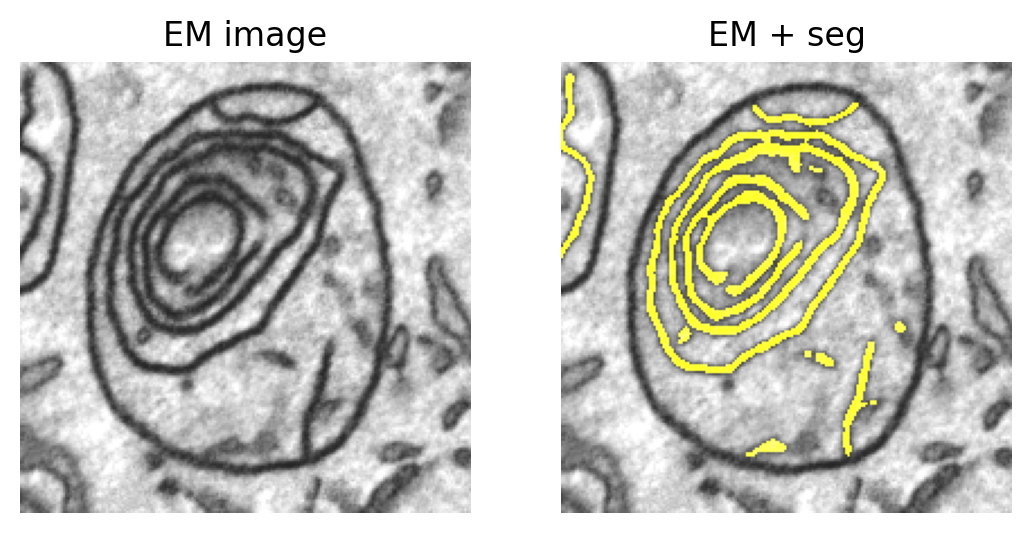

In [8]:
#onionにみえるところ
N = 377
x = 326
y = 372

_ = np.zeros(ori_imgs.shape)
masked_ori_imgs = make_mask_img(ori_imgs[N] + 0.5, _[N])
masked_seg_imgs = make_mask_img(ori_imgs[N] + 0.5, seg_imgs_lamellar[N])
plt.figure(dpi=200)

plt.subplot(1, 2, 1)
plt.title("EM image")
plt.axis("off")
plt.imshow(masked_ori_imgs[x-100:x+100,y-100:y+100])

plt.subplot(1, 2,2)
plt.title("EM + seg")
plt.axis("off")
plt.imshow(masked_seg_imgs[x-100:x+100,y-100:y+100])


In [9]:
out_dir = "Z:/paper_data/2021_cristae/for_revision_#2/figS7D"

os.makedirs(out_dir, exist_ok = True)

cv2.imwrite(
    f"{out_dir}/shOPA1_cropped05_onion_001_onion_ori.png",
    denormalize_y(masked_ori_imgs[x-100:x+100,y-100:y+100])
)
cv2.imwrite(
    f"{out_dir}/shOPA1_cropped05_onion_001_onion_seg.png",
    denormalize_y(masked_seg_imgs[x-100:x+100,y-100:y+100])
)

True

# Onionの2枚目

In [10]:
ori_imgs, _ = load_X_gray(r"Z:\DeepLearningData\research_010_NIH3T3\shOPA1_003\dataset\cropped_001\resize_10x10x10")

['0000.png', '0001.png', '0002.png', '0003.png', '0004.png', '0005.png', '0006.png', '0007.png', '0008.png', '0009.png', '0010.png', '0011.png', '0012.png', '0013.png', '0014.png', '0015.png', '0016.png', '0017.png', '0018.png', '0019.png', '0020.png', '0021.png', '0022.png', '0023.png', '0024.png', '0025.png', '0026.png', '0027.png', '0028.png', '0029.png', '0030.png', '0031.png', '0032.png', '0033.png', '0034.png', '0035.png', '0036.png', '0037.png', '0038.png', '0039.png', '0040.png', '0041.png', '0042.png', '0043.png', '0044.png', '0045.png', '0046.png', '0047.png', '0048.png', '0049.png', '0050.png', '0051.png', '0052.png', '0053.png', '0054.png', '0055.png', '0056.png', '0057.png', '0058.png', '0059.png', '0060.png', '0061.png', '0062.png', '0063.png', '0064.png', '0065.png', '0066.png', '0067.png', '0068.png', '0069.png', '0070.png', '0071.png', '0072.png', '0073.png', '0074.png', '0075.png', '0076.png', '0077.png', '0078.png', '0079.png', '0080.png', '0081.png', '0082.png', '00

(2048, 1659)
(2048, 1659)
(2048, 1659)
(2048, 1659)
(2048, 1659)
(2048, 1659)
(2048, 1659)
(2048, 1659)
(2048, 1659)
(2048, 1659)
(2048, 1659)
(2048, 1659)
(2048, 1659)
(2048, 1659)
(2048, 1659)
(2048, 1659)
(2048, 1659)
(2048, 1659)
(2048, 1659)
(2048, 1659)
(2048, 1659)
(2048, 1659)
(2048, 1659)
(2048, 1659)
(2048, 1659)
(2048, 1659)
(2048, 1659)
(2048, 1659)
(2048, 1659)
(2048, 1659)
(2048, 1659)
(2048, 1659)
(2048, 1659)
(2048, 1659)
(2048, 1659)
(2048, 1659)
(2048, 1659)
(2048, 1659)
(2048, 1659)
(2048, 1659)
(2048, 1659)
(2048, 1659)
(2048, 1659)
(2048, 1659)
(2048, 1659)
(2048, 1659)
(2048, 1659)
(2048, 1659)
(2048, 1659)
(2048, 1659)
(2048, 1659)
(2048, 1659)
(2048, 1659)
(2048, 1659)
(2048, 1659)
(2048, 1659)
(2048, 1659)
(2048, 1659)
(2048, 1659)
(2048, 1659)
(2048, 1659)
(2048, 1659)
(2048, 1659)
(2048, 1659)
(2048, 1659)
(2048, 1659)
(2048, 1659)
(2048, 1659)
(2048, 1659)
(2048, 1659)
(2048, 1659)
(2048, 1659)
(2048, 1659)
(2048, 1659)
(2048, 1659)
(2048, 1659)
(2048, 1659)

In [ ]:
seg_imgs_lamellar, _ = load_Y_gray_with_gaussian_and_numeric(r"Z:\DeepLearningData\research_010_NIH3T3\shOPA1_003\annotations\cropped_001\merged_cristae_final\lamellar_with_postprocessing")
seg_imgs_tubular, _ = load_Y_gray_with_gaussian_and_numeric(r"Z:\DeepLearningData\research_010_NIH3T3\shOPA1_003\annotations\cropped_001\merged_cristae_final\tubular_with_postprocessing")

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [ ]:
seg_imgs_tubular = np.where(
    seg_imgs_tubular > 0,
    255,
    0
)
seg_imgs_lamellar = np.where(
    seg_imgs_lamellar > 0,
    255,
    0
)

In [ ]:
#onionにみえるところ
N = 315
y = 1245
x = 1462

_ = np.zeros(ori_imgs.shape)
masked_ori_imgs = make_mask_img(ori_imgs[N] + 0.5, _[N])
masked_seg_imgs = make_mask_img(ori_imgs[N] + 0.5, seg_imgs_lamellar[N])
plt.figure(dpi=200)

plt.subplot(1, 2, 1)
plt.title("EM image")
plt.axis("off")
plt.imshow(masked_ori_imgs[x-50:x+50,y-50:y+50])

plt.subplot(1, 2,2)
plt.title("EM + seg")
plt.axis("off")
plt.imshow(masked_seg_imgs[x-50:x+50,y-50:y+50])


In [ ]:
out_dir = "Z:/paper_data/2021_cristae/for_revision_#2/figS7D"

os.makedirs(out_dir, exist_ok = True)

cv2.imwrite(
    f"{out_dir}/shOPA1_cropped01_onion_001_onion_ori.png",
    denormalize_y(masked_ori_imgs[x-50:x+50,y-50:y+50])
)
cv2.imwrite(
    f"{out_dir}/shOPA1_cropped01_onion_001_onion_seg.png",
    denormalize_y(masked_seg_imgs[x-50:x+50,y-50:y+50])
)